#Google Stock Price Prediction using LSTM 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving GOOG.csv to GOOG.csv
User uploaded file "GOOG.csv" with length 13323 bytes


In [3]:
google = pd.read_csv("GOOG.csv")
google.head()

,Date,Open Price,Close Price,Adj Close Price,Volume
0,6/14/2019,1086.420044,1085.349976,1085.349976,1111500
1,6/17/2019,1086.280029,1092.500000,1092.500000,941600
2,6/18/2019,1109.689941,1103.599976,1103.599976,1386700
3,6/19/2019,1105.599976,1102.329956,1102.329956,1338800
4,6/20/2019,1119.989990,1111.420044,1111.420044,1262000


In [4]:
print("trainging days =",google.shape)

trainging days = (252, 5)


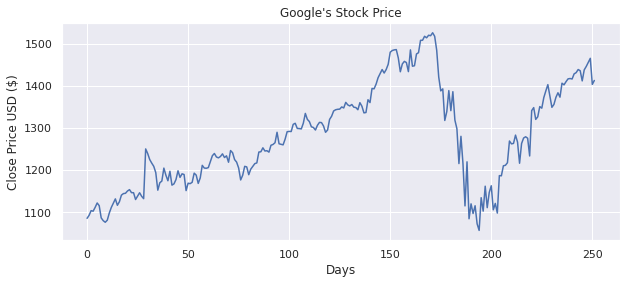

In [5]:
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 4))
plt.title("Google's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(google["Close Price"])
plt.show()

In [6]:
google = google[["Close Price"]]
print(google.head())

   Close Price
0  1085.349976
1  1092.500000
2  1103.599976
3  1102.329956
4  1111.420044


In [7]:
#Creating a variable to predict ‘X’ days in the future:
futureDays = 25
# create a new target column shifted 'X' units/days up
google["Prediction"] = google[["Close Price"]].shift(-futureDays)
print(google.head())
print(google.tail())

   Close Price   Prediction
0  1085.349976  1138.069946
1  1092.500000  1146.209961
2  1103.599976  1137.810059
3  1102.329956  1132.119995
4  1111.420044  1250.410034
     Close Price  Prediction
247  1446.609985         NaN
248  1456.160034         NaN
249  1465.849976         NaN
250  1403.839966         NaN
251  1413.180054         NaN


In [9]:
#To create a feature data set (x) and convert into a numpy array and remove last ‘x’ rows/days:
x = np.array(google.drop(["Prediction"], 1))[:-futureDays]
print(x)


[[1085.349976]
 [1092.5     ]
 [1103.599976]
 [1102.329956]
 [1111.420044]
 [1121.880005]
 [1115.52002 ]
 [1086.349976]
 [1079.800049]
 [1076.01001 ]
 [1080.910034]
 [1097.949951]
 [1111.25    ]
 [1121.579956]
 [1131.589966]
 [1116.349976]
 [1124.829956]
 [1140.47998 ]
 [1144.209961]
 [1144.900024]
 [1150.339966]
 [1153.579956]
 [1146.349976]
 [1146.329956]
 [1130.099976]
 [1138.069946]
 [1146.209961]
 [1137.810059]
 [1132.119995]
 [1250.410034]
 [1239.410034]
 [1225.140015]
 [1216.680054]
 [1209.01001 ]
 [1193.98999 ]
 [1152.319946]
 [1169.949951]
 [1173.98999 ]
 [1204.800049]
 [1188.01001 ]
 [1174.709961]
 [1197.27002 ]
 [1164.290039]
 [1167.26001 ]
 [1177.599976]
 [1198.449951]
 [1182.689941]
 [1191.25    ]
 [1189.530029]
 [1151.290039]
 [1168.890015]
 [1167.839966]
 [1171.02002 ]
 [1192.849976]
 [1188.099976]
 [1168.390015]
 [1181.410034]
 [1211.380005]
 [1204.930054]
 [1204.410034]
 [1206.      ]
 [1220.170044]
 [1234.25    ]
 [1239.560059]
 [1231.300049]
 [1229.150024]
 [1232.410

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [10]:
#To create a target dataset (y) and convert it to a numpy array and get all of the target values except the last ‘x’ rows days:
y = np.array(google["Prediction"])[:-futureDays]
print(y)

[1138.069946 1146.209961 1137.810059 1132.119995 1250.410034 1239.410034
 1225.140015 1216.680054 1209.01001  1193.98999  1152.319946 1169.949951
 1173.98999  1204.800049 1188.01001  1174.709961 1197.27002  1164.290039
 1167.26001  1177.599976 1198.449951 1182.689941 1191.25     1189.530029
 1151.290039 1168.890015 1167.839966 1171.02002  1192.849976 1188.099976
 1168.390015 1181.410034 1211.380005 1204.930054 1204.410034 1206.
 1220.170044 1234.25     1239.560059 1231.300049 1229.150024 1232.410034
 1238.709961 1229.930054 1234.030029 1218.76001  1246.52002  1241.390015
 1225.089966 1219.       1205.099976 1176.630005 1187.829956 1209.
 1207.680054 1189.130005 1202.310059 1208.670044 1215.449951 1217.140015
 1243.01001  1243.640015 1253.069946 1245.48999  1246.150024 1242.800049
 1259.130005 1260.98999  1265.130005 1290.       1262.619995 1261.290039
 1260.109985 1273.73999  1291.369995 1292.030029 1291.800049 1308.859985
 1311.369995 1299.189941 1298.800049 1298.       1311.459961 13

In [14]:
#Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [12]:
regressor = Sequential()

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

In [16]:
##add 2nd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

In [17]:
regressor.add(Dense(units = 1))

In [19]:
#Compile
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [ ]:
#Model fitting
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 10000)

Streaming output truncated to the last 5000 lines.
6/6 [==============================] - 0s 11ms/step - loss: 1018614.0000
Epoch 1037/10000
6/6 [==============================] - 0s 12ms/step - loss: 1024147.0000
Epoch 1038/10000
6/6 [==============================] - 0s 14ms/step - loss: 1018319.1250
Epoch 1039/10000
6/6 [==============================] - 0s 14ms/step - loss: 1017625.6875
Epoch 1040/10000
6/6 [==============================] - 0s 13ms/step - loss: 1014970.5625
Epoch 1041/10000
6/6 [==============================] - 0s 13ms/step - loss: 1020590.1250
Epoch 1042/10000
6/6 [==============================] - 0s 14ms/step - loss: 1021399.4375
Epoch 1043/10000
6/6 [==============================] - 0s 12ms/step - loss: 1018544.5625
Epoch 1044/10000
6/6 [==============================] - 0s 13ms/step - loss: 1015430.5000
Epoch 1045/10000
6/6 [==============================] - 0s 13ms/step - loss: 1016086.3125
Epoch 1046/10000
6/6 [==============================] - 0s 11ms/st